In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

I test TextBlob with a simple sentence to determine initial polarity boundaries using polarity result.

In [2]:
test = TextBlob("I enjoyed today.")
print(test.sentiment)

Sentiment(polarity=0.5, subjectivity=0.7)


In [3]:
file1 = open('the_windhover.txt', 'r')

pos = 0;
neg = 0;
neu = 0;
lines = 0;
 
# Rating each line
for line in file1:
    b = line.strip()
    tb = TextBlob(b)
    score = tb.sentiment
    if b != "" :
        lines += 1
        print("{}\n {}".format(b, score))
    
        # depending on trends throughout files, I may adjust these markers (0.5 and -0.5)
    
        if tb.sentiment.polarity >= 0.2 :
            print(" Positive")
            pos += 1
 
        elif tb.sentiment.polarity <= - 0.2 :
            print(" Negative")
            neg += 1
 
        else :
            print(" Neutral")
            neu += 1
 
# Closing file(s)
file1.close()

I caught this morning morning's minion, king-
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
dom of daylight's dauphin, dapple-dawn-drawn Falcon, in his riding
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Of the rolling level underneath him steady air, and striding
 Sentiment(polarity=0.16666666666666666, subjectivity=0.5)
 Neutral
High there, how he rung upon the rein of a wimpling wing
 Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
 Neutral
In his ecstasy! then off, off forth on swing,
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
As a skate's heel sweeps smooth on a bow-bend: the hurl and gliding
 Sentiment(polarity=0.4, subjectivity=0.5)
 Positive
Rebuffed the big wind. My heart in hiding
 Sentiment(polarity=0.0, subjectivity=0.1)
 Neutral
Stirred for a bird, â€“ the achieve of, the mastery of the thing!
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Brute beauty and valour and act, oh, air, pride, plume, here
 Sentiment(polarity=0.0, subjectivity

In [4]:
print(neg, neu, pos)

0 13 1


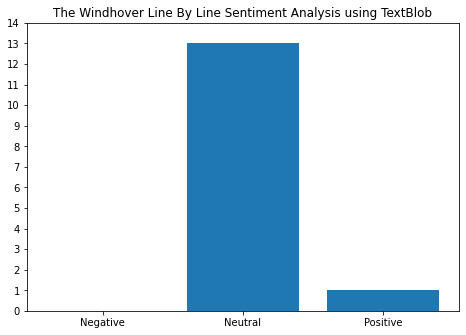

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lbls = ['Negative', 'Neutral', 'Positive']
compounds = [neg, neu, pos]
ax.bar(lbls, compounds)
ax.set_title('The Windhover Line By Line Sentiment Analysis using TextBlob')
ax.set_yticks(np.arange(0, 15, 1))
plt.show()

In [6]:
# The following code calculates the net sentiment rate (NSR) of the poem overall, rather than considering it line by line
file1 = open('the_windhover.txt', 'r')

nsr = np.zeros(lines + 1, dtype=float) # a 1x15 array (0:14 lines)
lines = 0
polarity = 0 

for line in file1:
    b = line.strip()
    tb = TextBlob(b)
    
    if b != '' :
        lines += 1
        
        # add polarity scores of all lines to evaluate poem as a whole later
        polarity += tb.sentiment.polarity 
    
        # add net sentiment rate per line to vector
        nsr[lines] = polarity / lines
    
# Closing file(s)
file1.close()

In [9]:
print(nsr[14]) # the final calculation of Net Sentiment Rate

0.03186507936507937


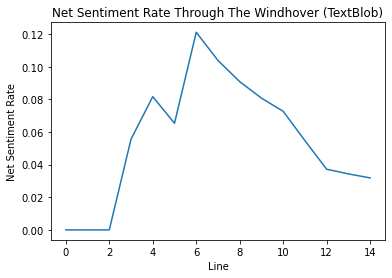

In [7]:
plt.plot(nsr)
plt.title('Net Sentiment Rate Through The Windhover (TextBlob)')
plt.xlabel('Line')
plt.ylabel('Net Sentiment Rate')
plt.show()